In [1]:
from load_contours import load_contours
import os

absolute_path = os.path.join(os.getcwd(), '..', '..', 'exports/')
data = load_contours(path=absolute_path+"2019-03-11_e6_d4_DiffGroup9_1-1.jsonl",mask_path=absolute_path+"DiffGroup9_1-1_arena_mask.png")
data

 ...]

In [1]:
import fishy
import pca
import os

absolute_path = os.path.join(os.getcwd(), '..', '..', 'exports/')
data = fishy.get_normalized_fish_blobs_from_data(data_path=absolute_path+"2019-03-11_e6_d4_DiffGroup9_1-1.jsonl",mask_path=absolute_path+"DiffGroup9_1-1_arena_mask.png")

pca_in = pca.get_pca_input_from_normalized_fish_blobs(data, minimum_blob_size=90 ,subfish_size=45)


In [4]:
comp_cnt = 5
fish_pca = PCA(n_components=comp_cnt)
transformed_fishes = fish_pca.fit_transform(pca_in)
#print(fish_pca.explained_variance_)
print(fish_pca.explained_variance_ratio_)
plt.plot(fish_pca.explained_variance_ratio_)
plt.show()
#print(fish_pca.singular_values_)
#print(fish_pca.components_)

rebuilt_fishes = fish_pca.inverse_transform(transformed_fishes)

(769, 90)

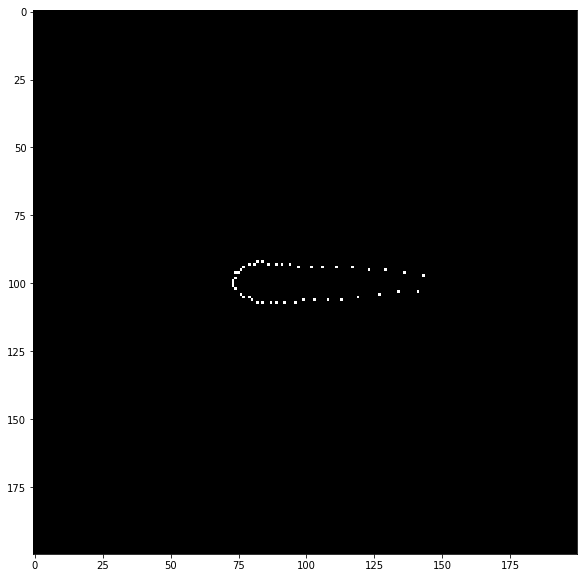

In [234]:
testZeros = pca.inverse_transform([0,80,0,0,0])
zeroFish = fishy.FishBlob(testZeros[0:45],testZeros[45:90],np.array([0,0]))
plt.figure(figsize=(10,10))
plt.imshow(get_fish_on_canvas(zeroFish,canvas_size=(200,200)),cmap="gray")

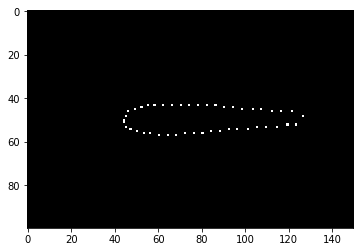

In [170]:
m = pca.mean_

meanFish = fishy.FishBlob(pca.mean_[0:45],pca.mean_[45:90],np.array([0,0]))
plt.imshow(printFish2(meanFish,canvasSize=(100,150)),cmap="gray")

24


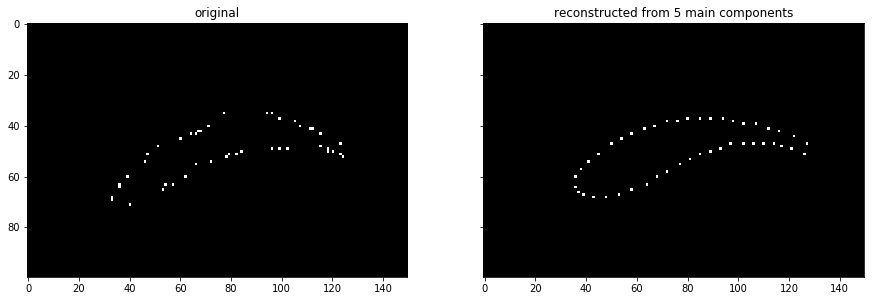

25


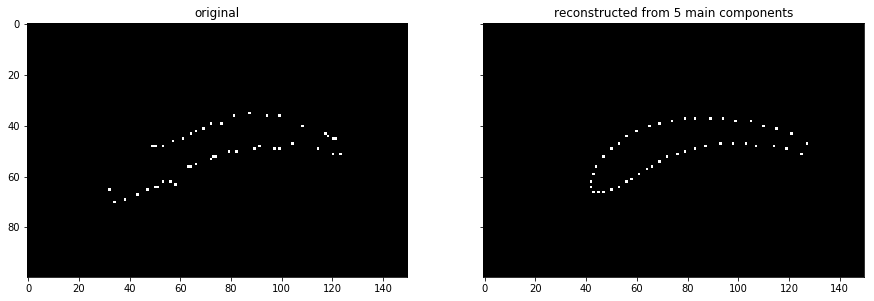

42


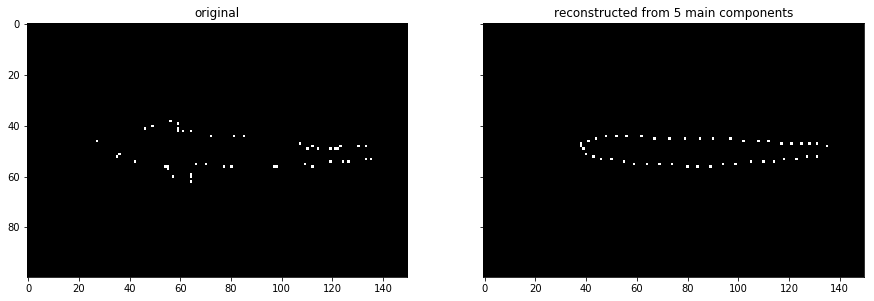

59


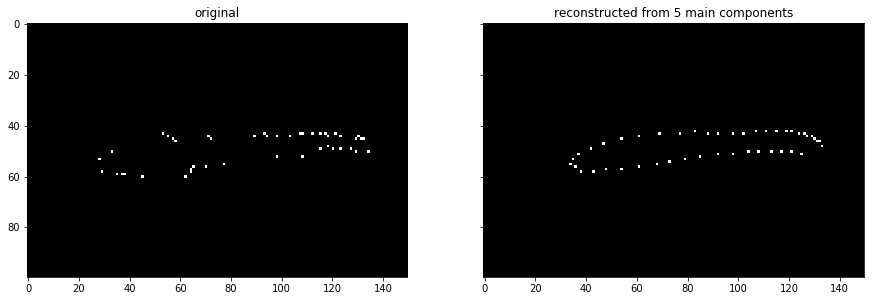

118


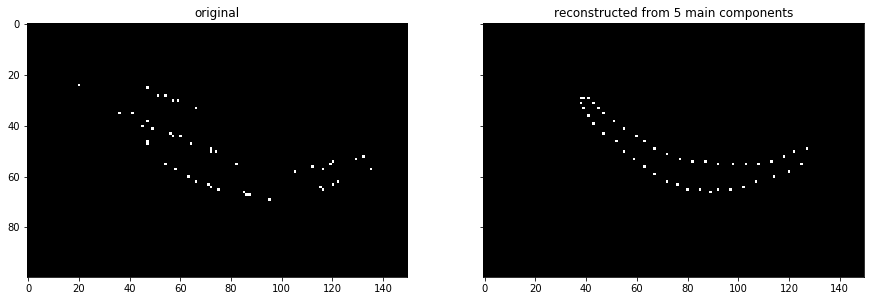

132


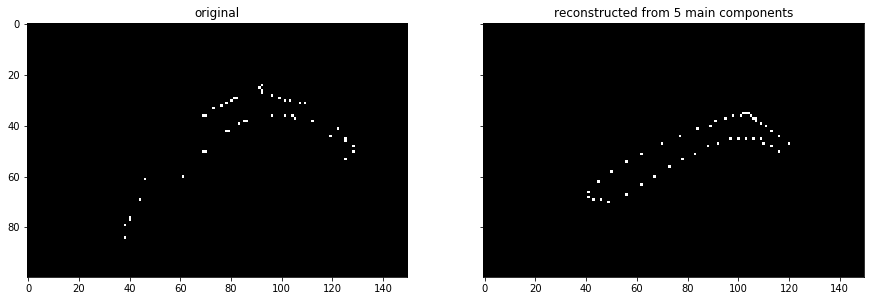

172


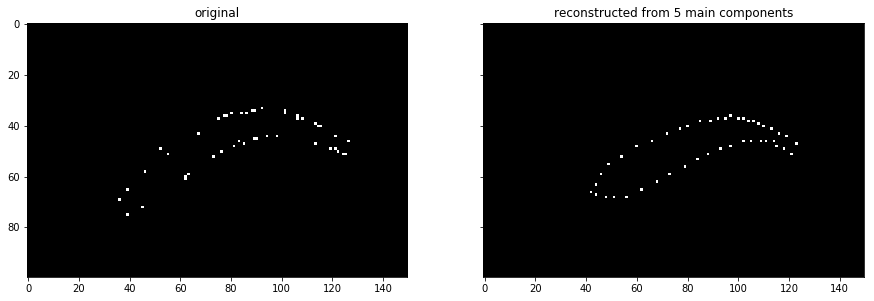

233


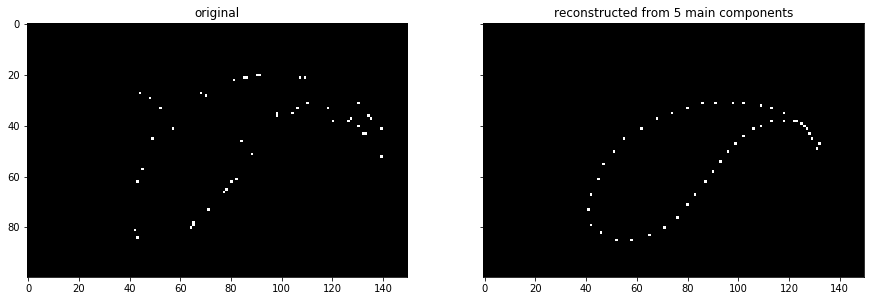

251


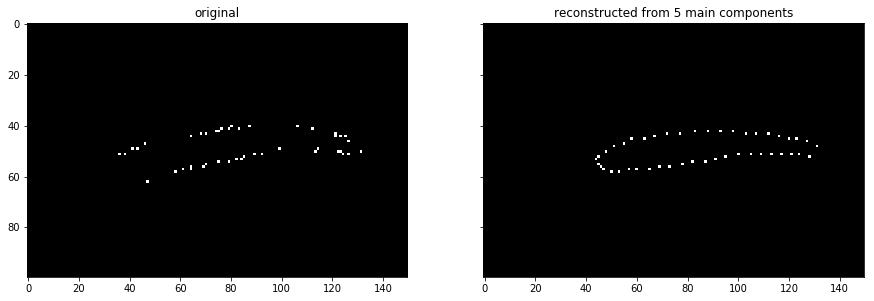

258


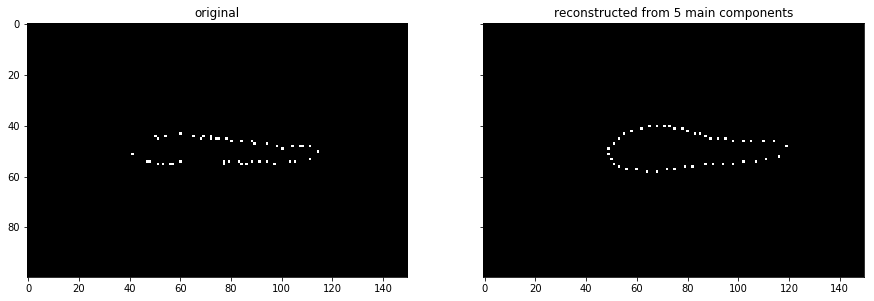

263


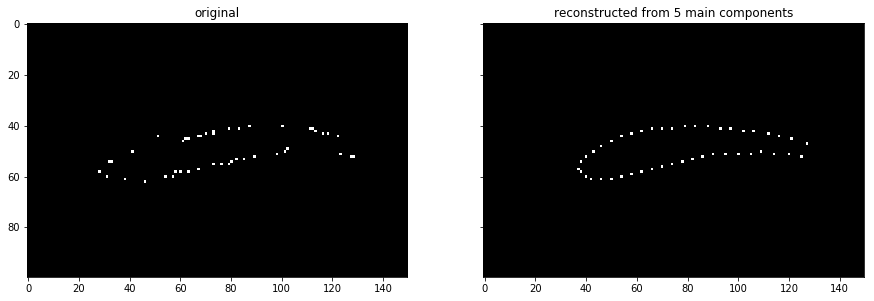

274


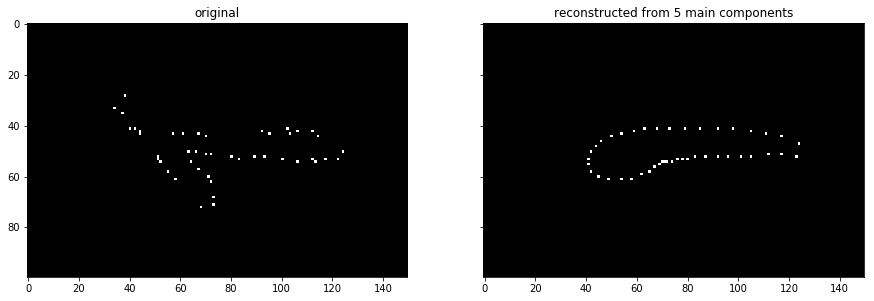

277


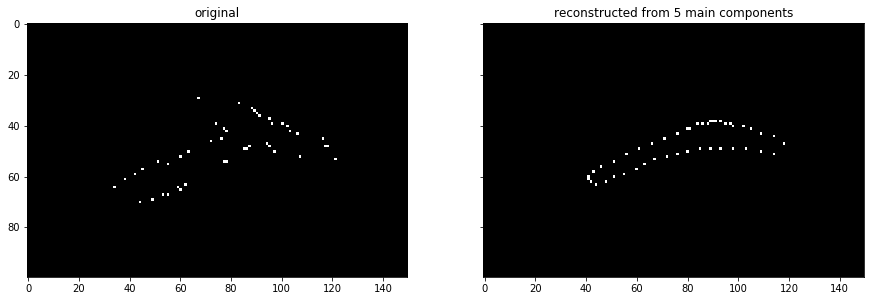

285


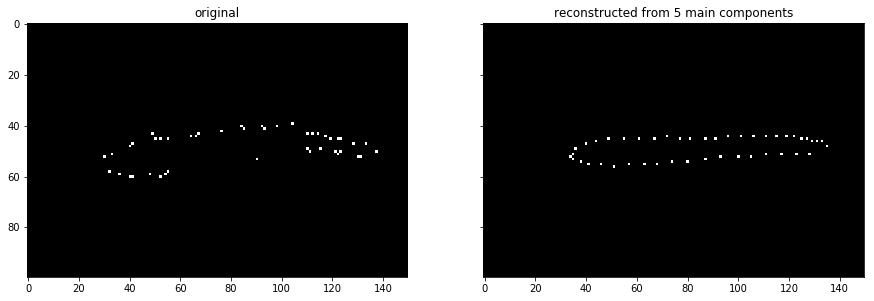

307


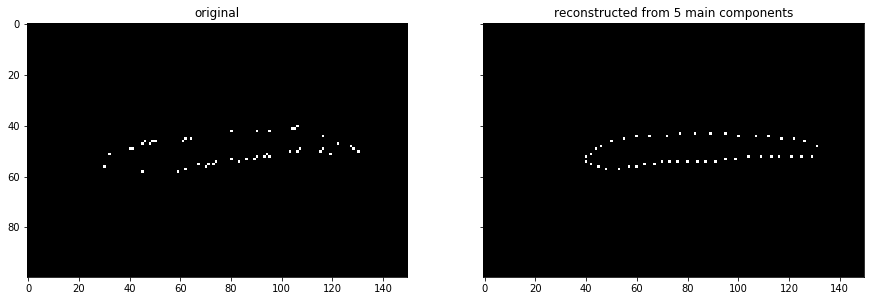

347


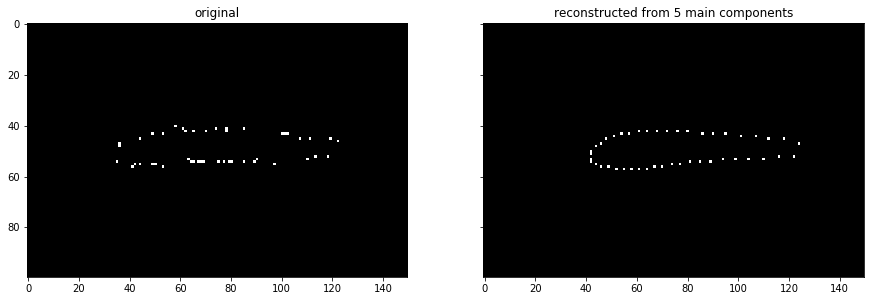

378


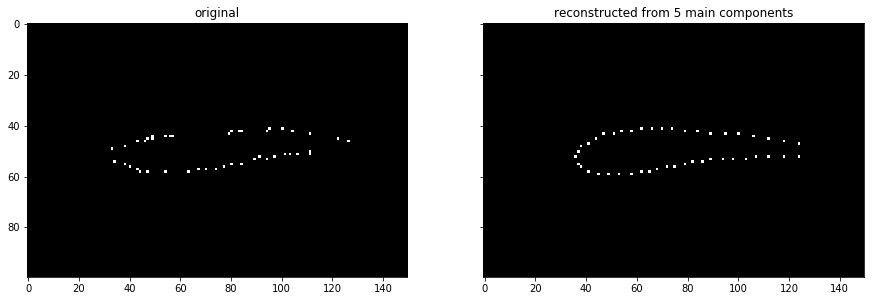

411


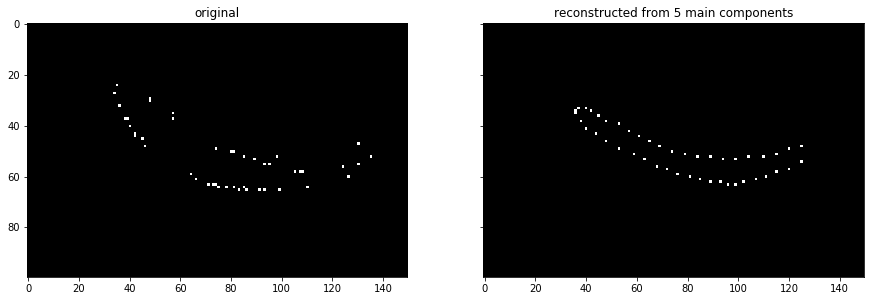

469


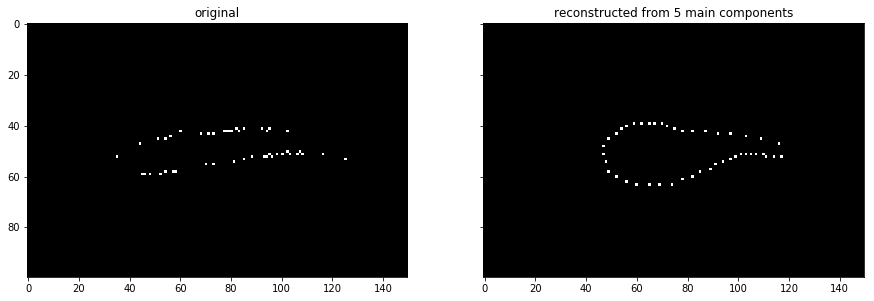

481


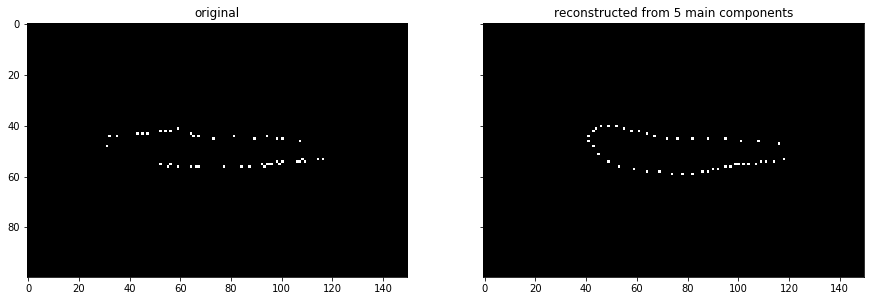

482


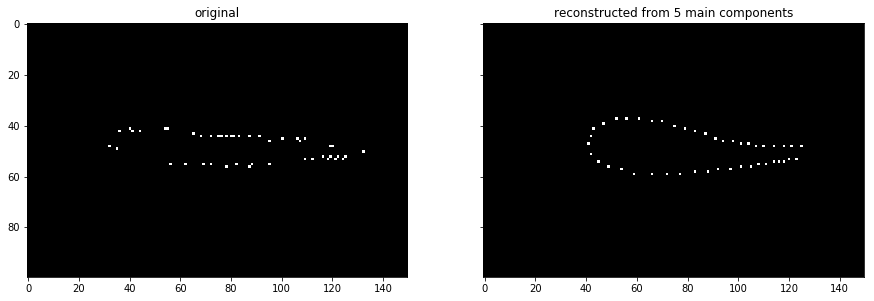

507


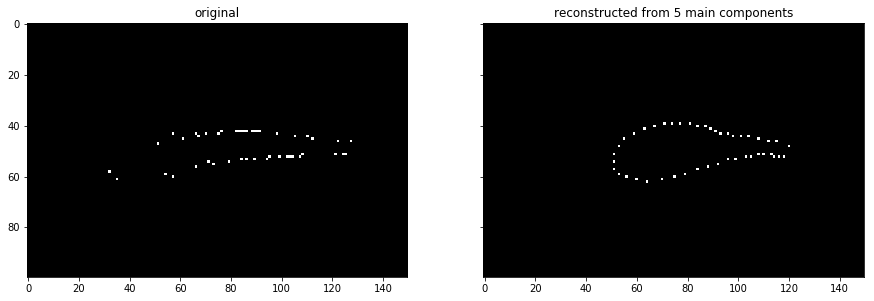

550


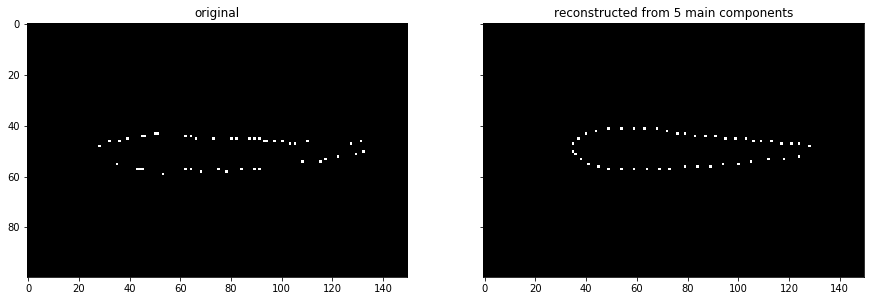

564


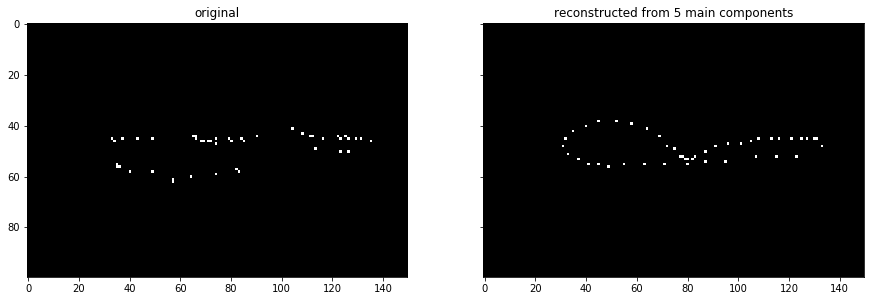

641


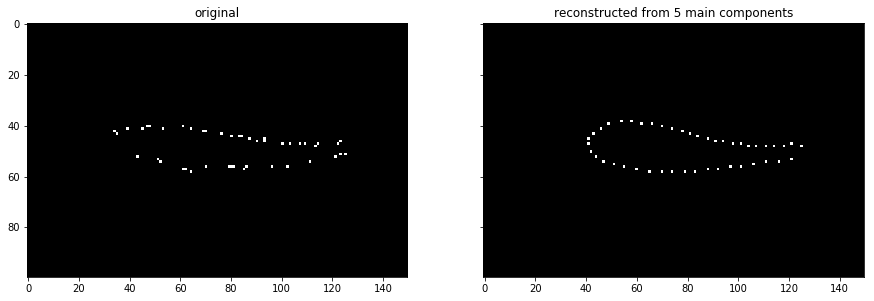

701


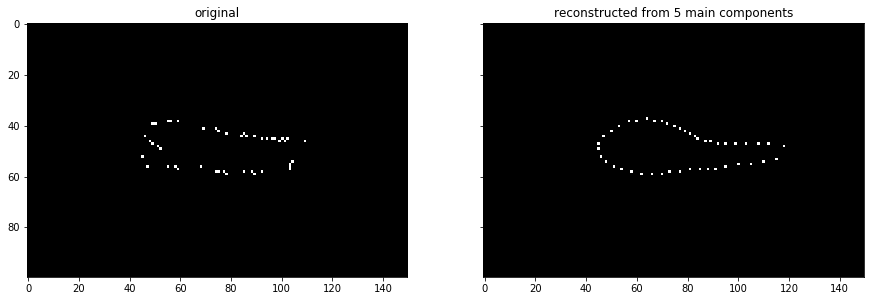

713


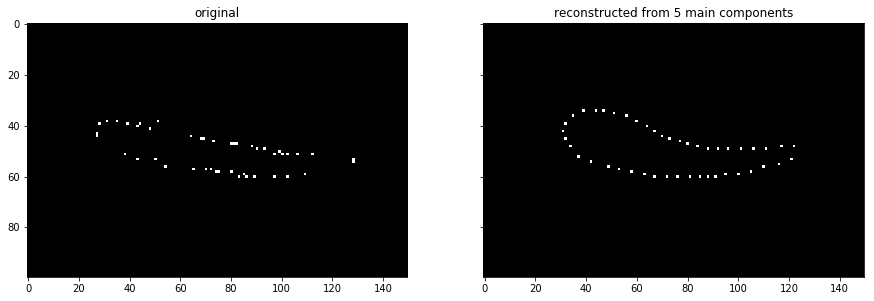

715


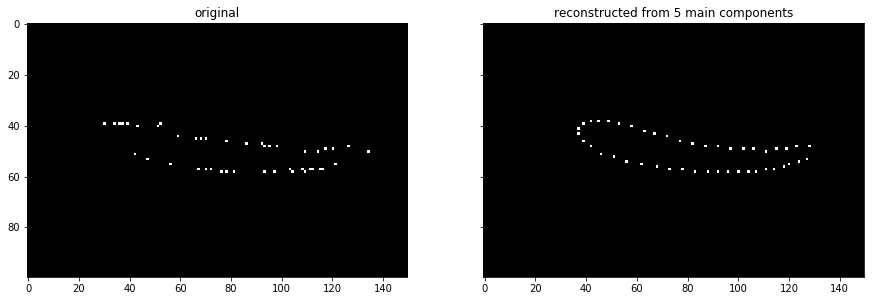

724


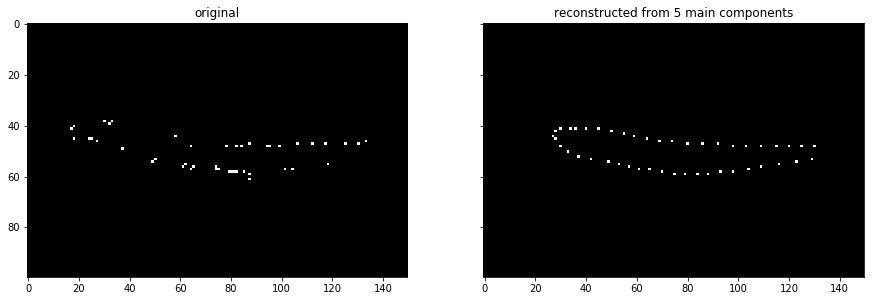

745


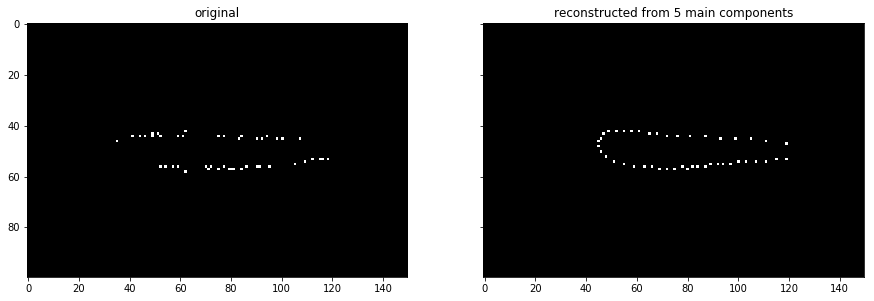

In [166]:
selector2 = randomSubarray(np.arange(len(subBlobs)),30)
for n in selector2:
    print(n)
    testFish = fishy.FishBlob(rebuilt_fishes[n,0:45],rebuilt_fishes[n,45:90],np.array([0,0]))
    fig, axes = plt.subplots(ncols=2,nrows=1,sharey=True)
    new = printFish2(testFish,canvasSize=(100,150))
    old = printFish2(subBlobs[n],canvasSize=(100,150))
    fig.set_figwidth(val=15)
    fig.set_figheight(val=18)
    axes[0].imshow(old,cmap="gray")
    axes[1].imshow(new,cmap="gray")
    axes[0].set_title("original")
    axes[1].set_title(f"reconstructed from {comp_cnt} main components")
    plt.show()

In [ ]:
np.array([])

In [68]:
a,b,c = range(3)
a,b,c

(0, 1, 2)

In [65]:
type(range(3))

TypeError: type.__new__() argument 1 must be str, not int

In [81]:
a, b = np.array([[1,2,3],[-1,-2,-3]]), np.array([[4,5,6],[-4,-5,-6]])
a, b = a.reshape((6,)),  b.reshape((6,))
[*a,*b]

[1, 2, 3, -1, -2, -3, 4, 5, 6, -4, -5, -6]

In [66]:
type(1,2,3)

TypeError: type.__new__() argument 1 must be str, not int

26


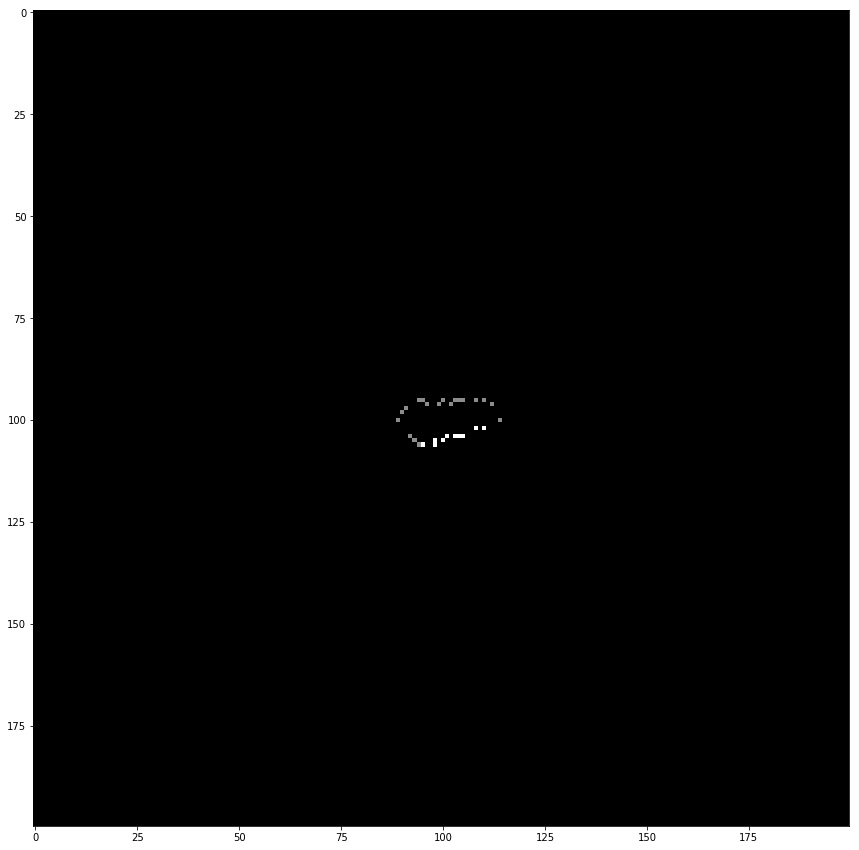

30


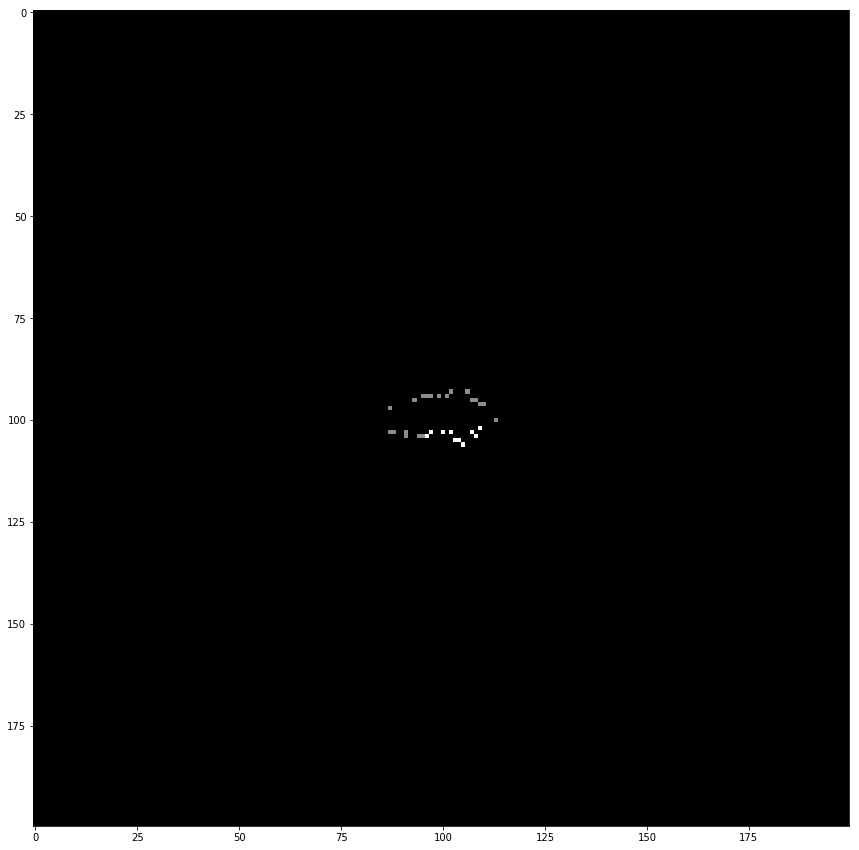

31


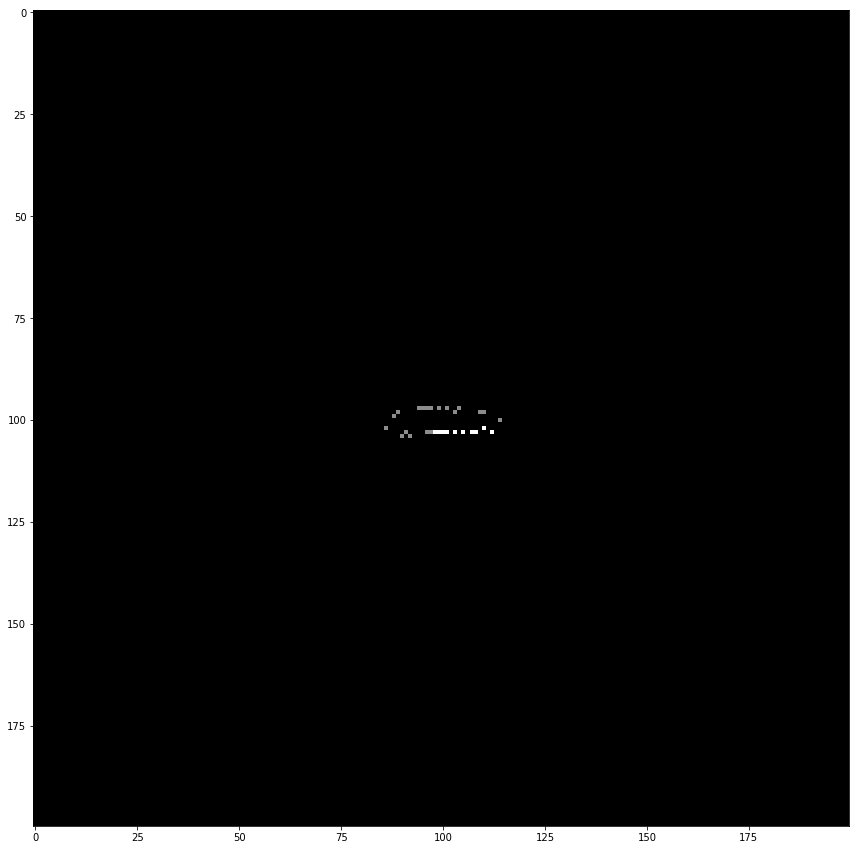

32


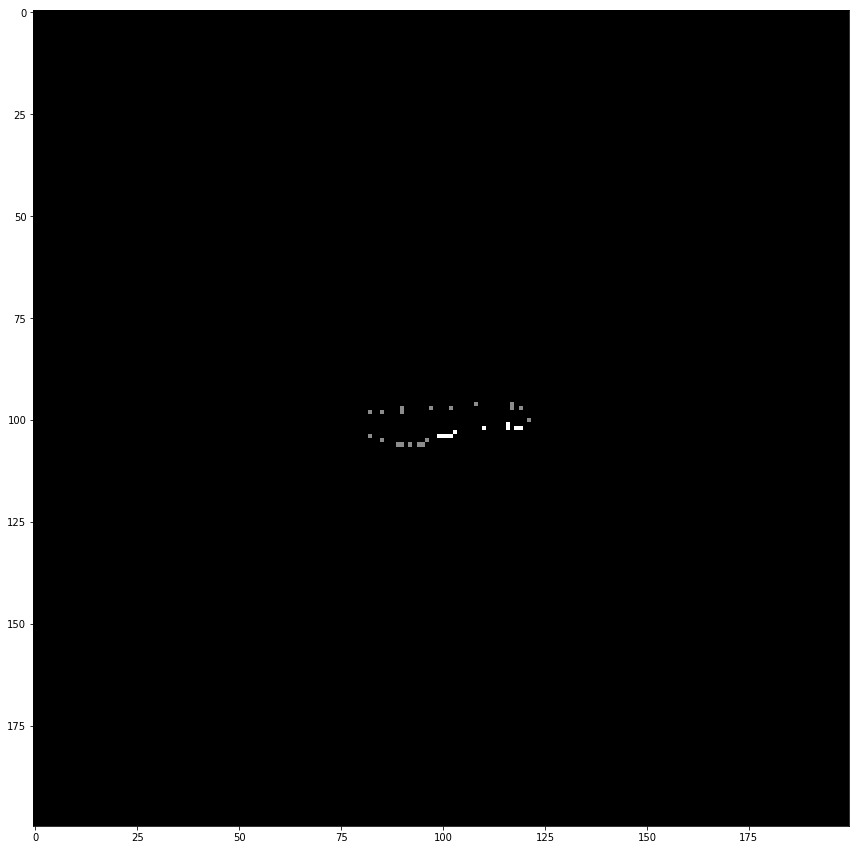

34


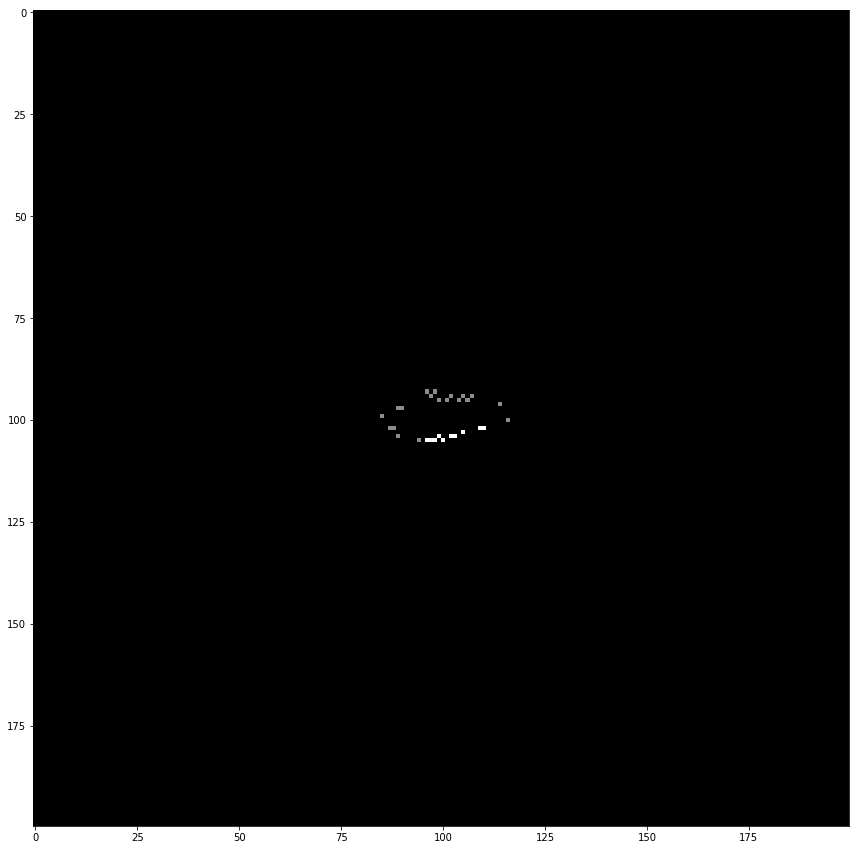

35


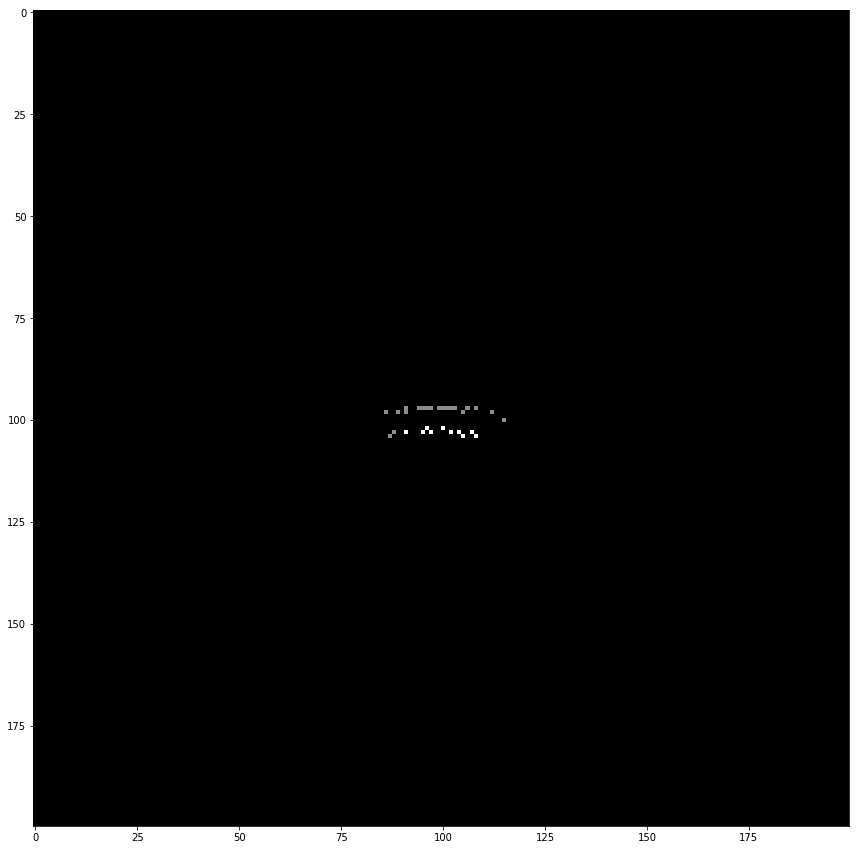

36


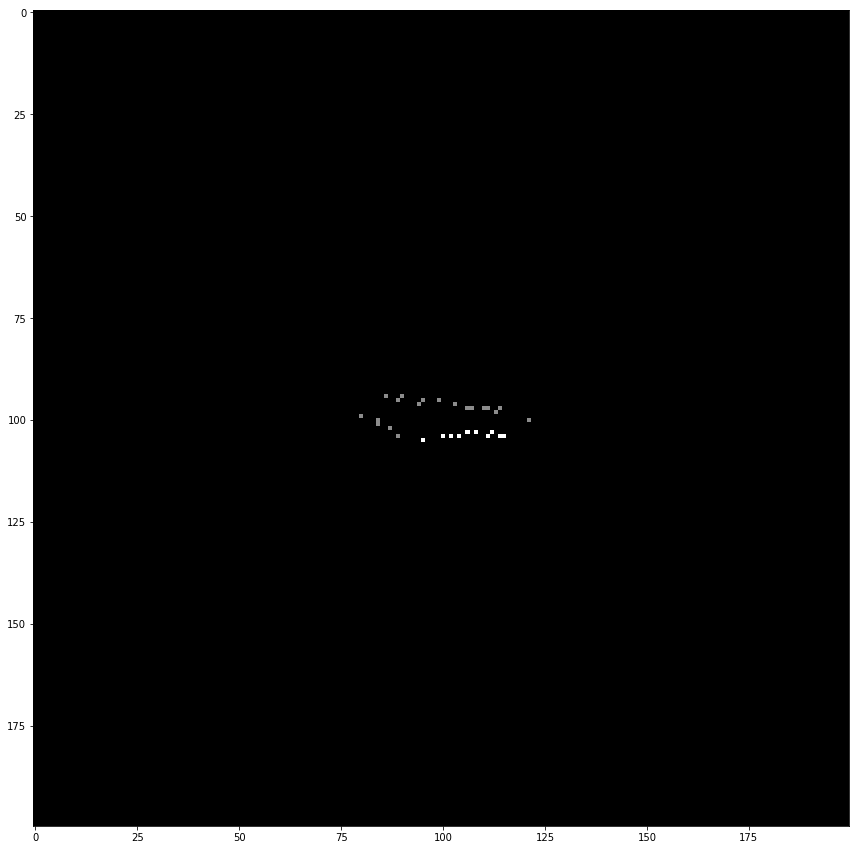

38


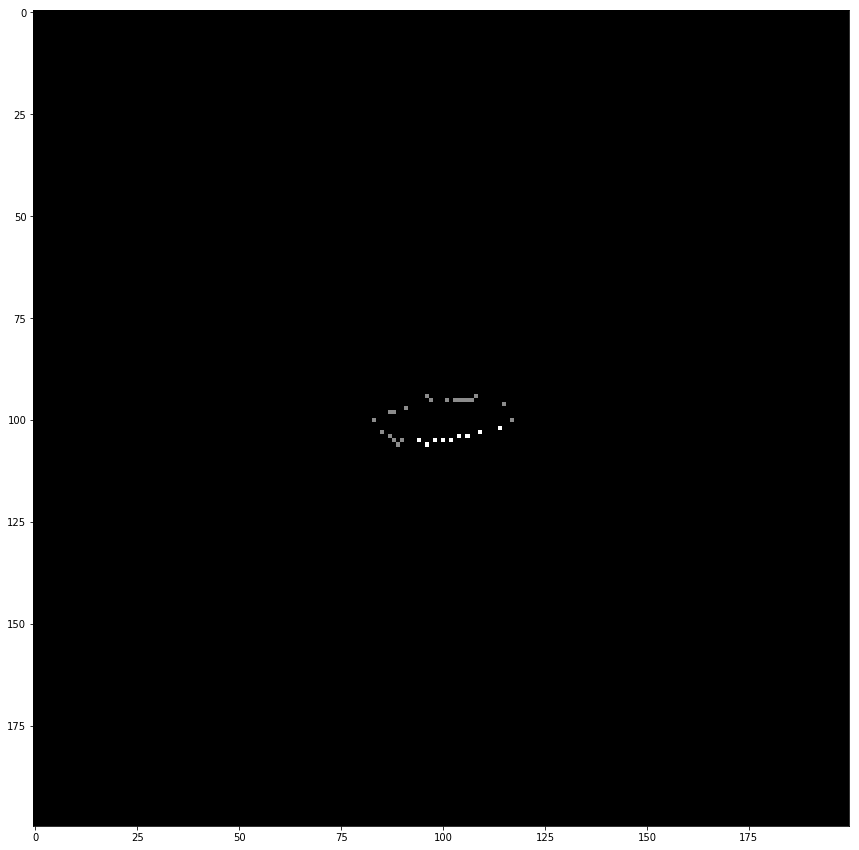

39


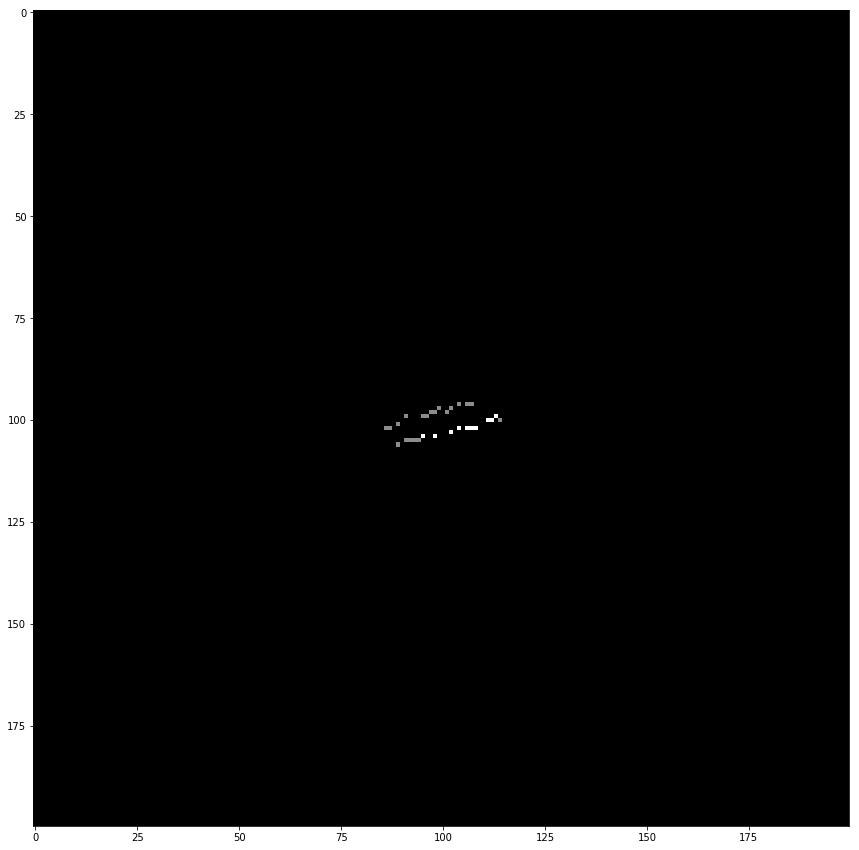

41


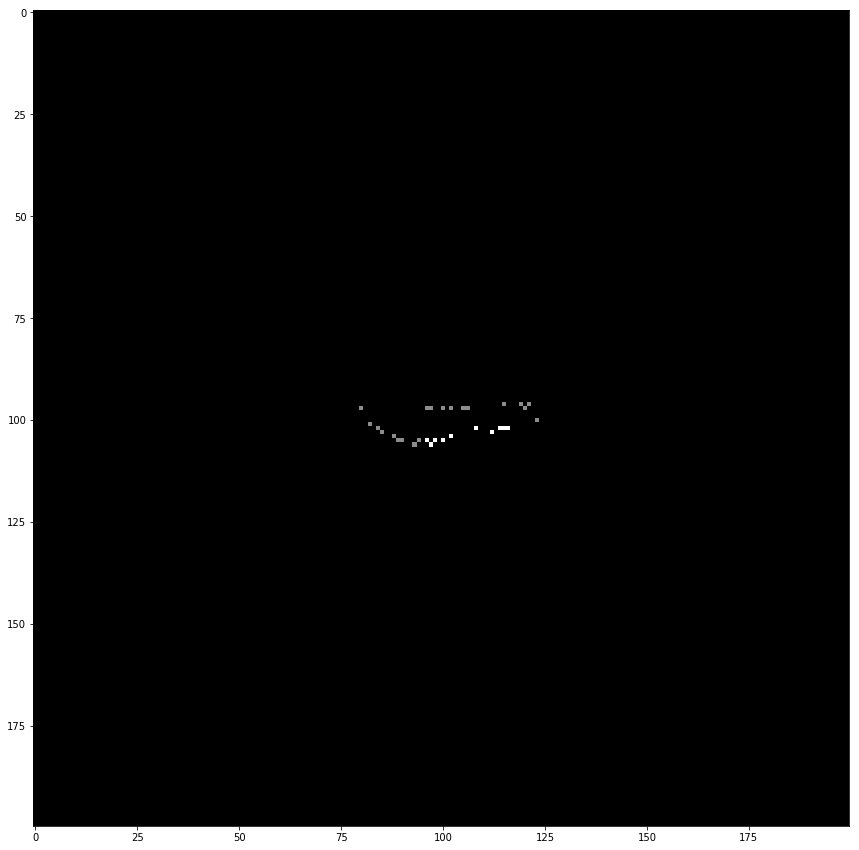

43


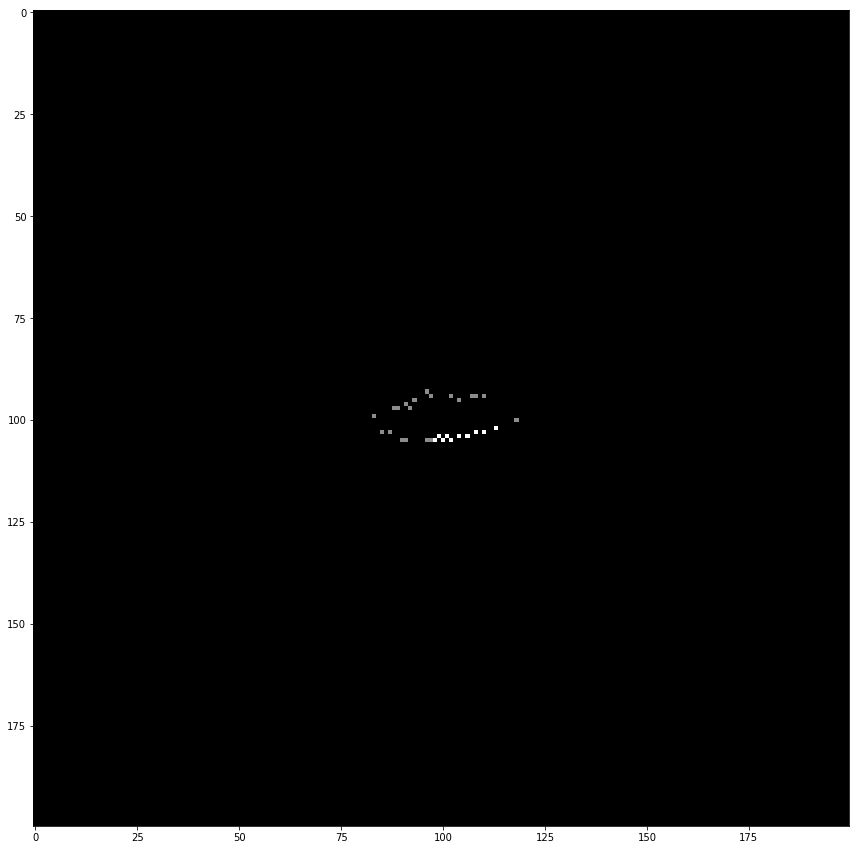

44


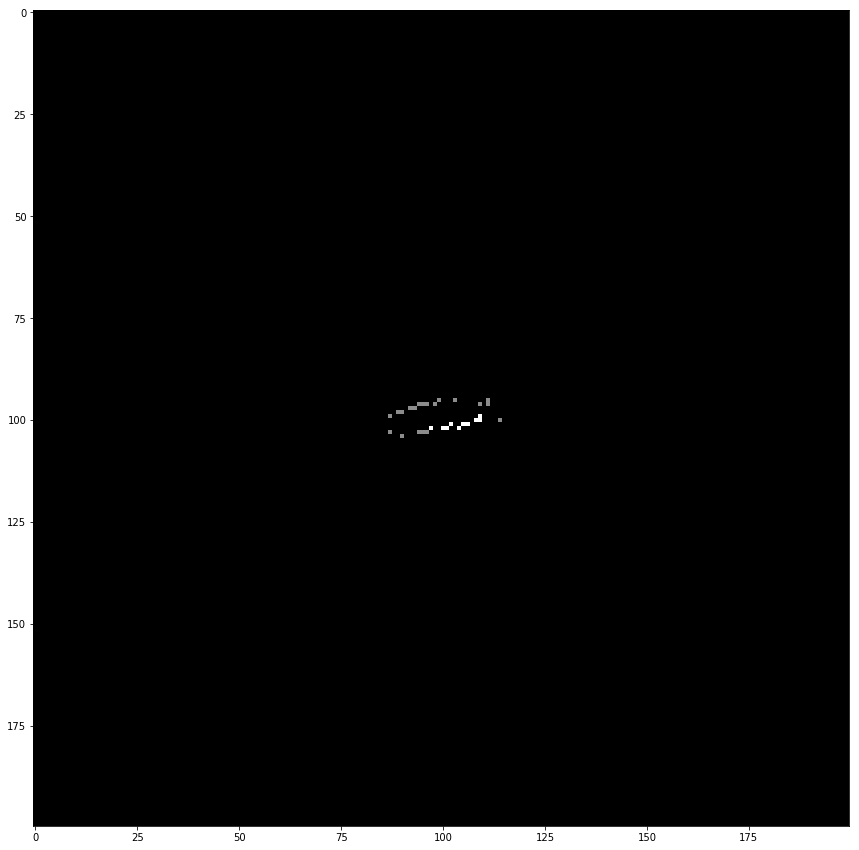

45


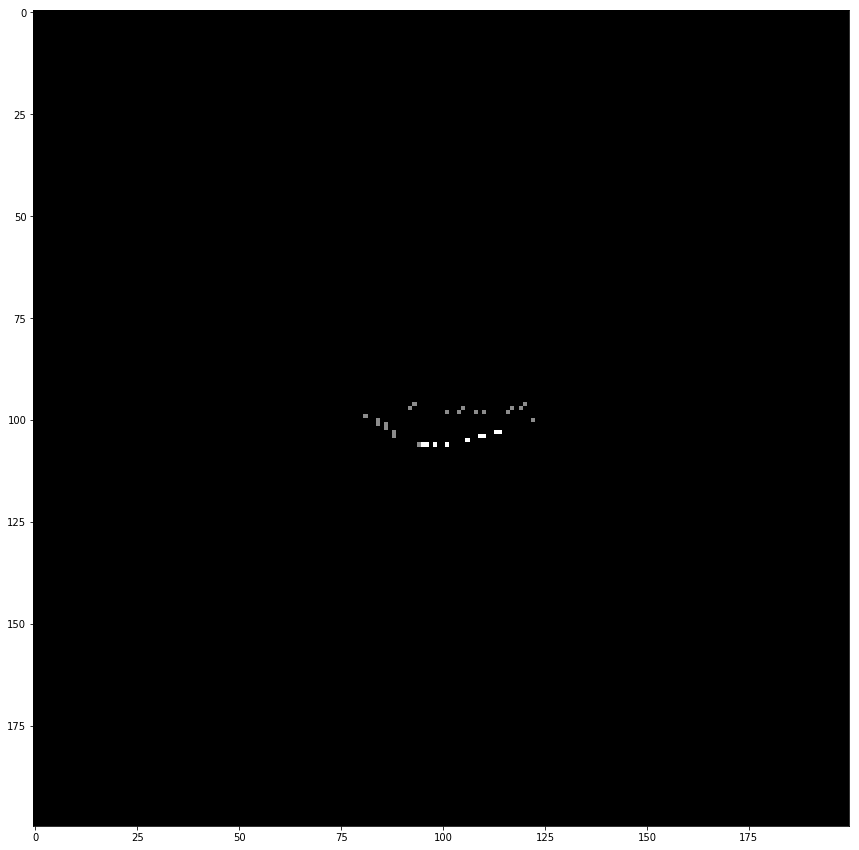

47


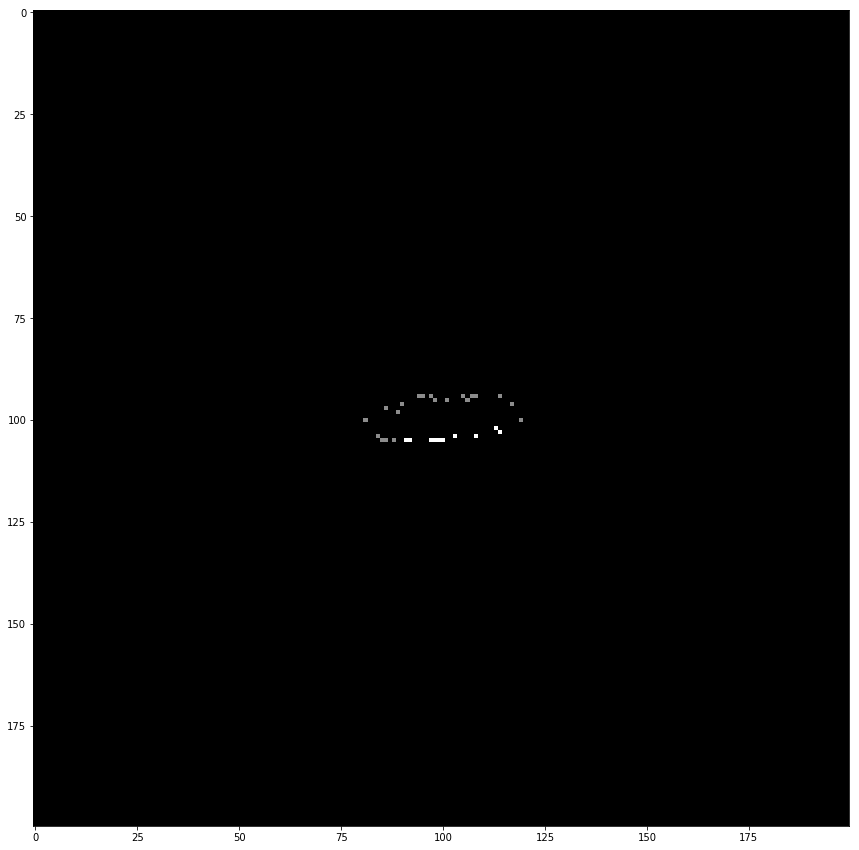

48


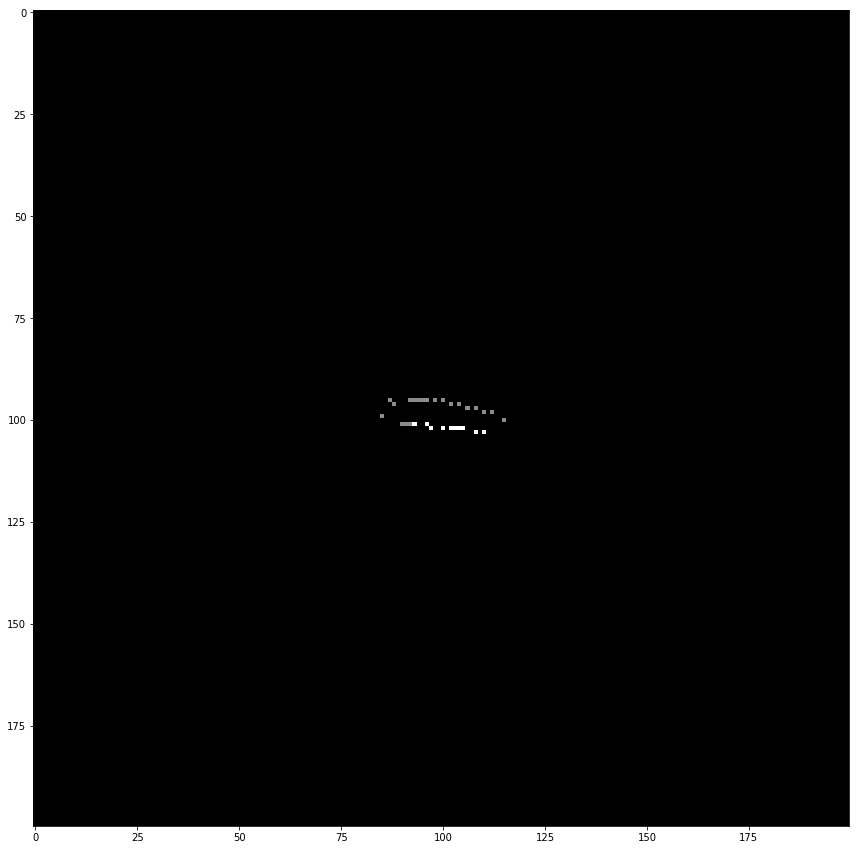

49


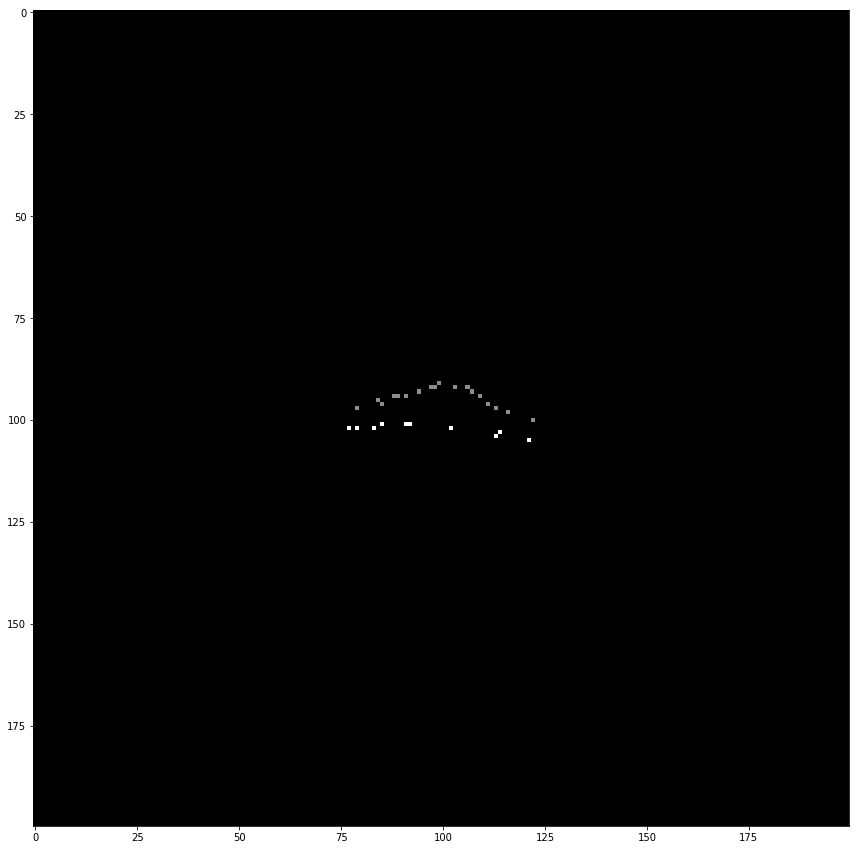

51


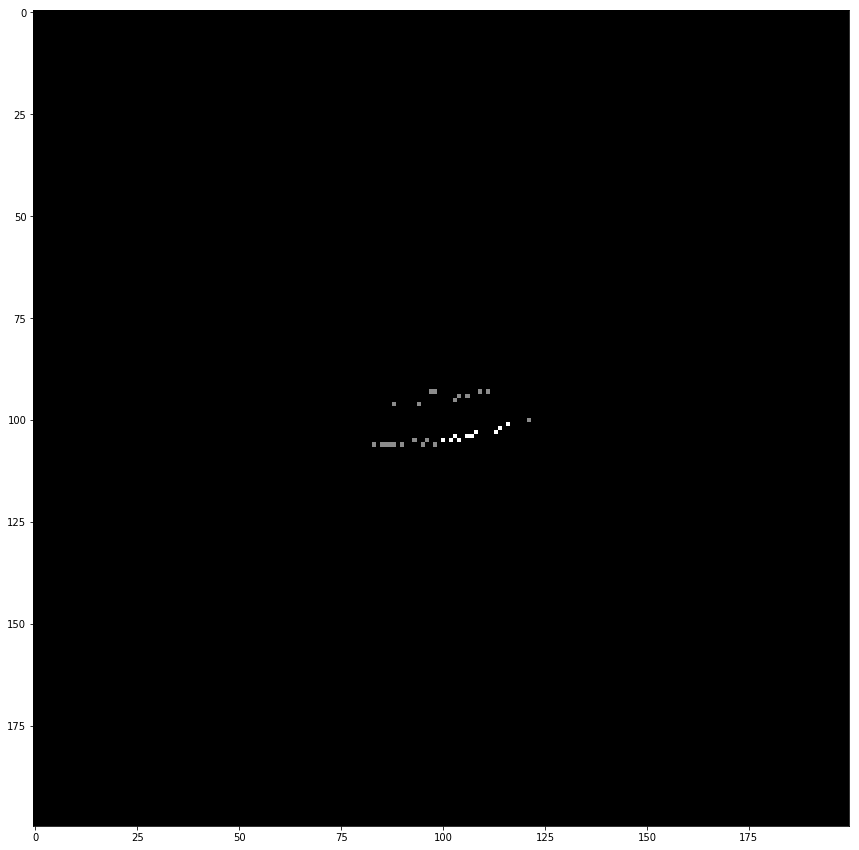

52


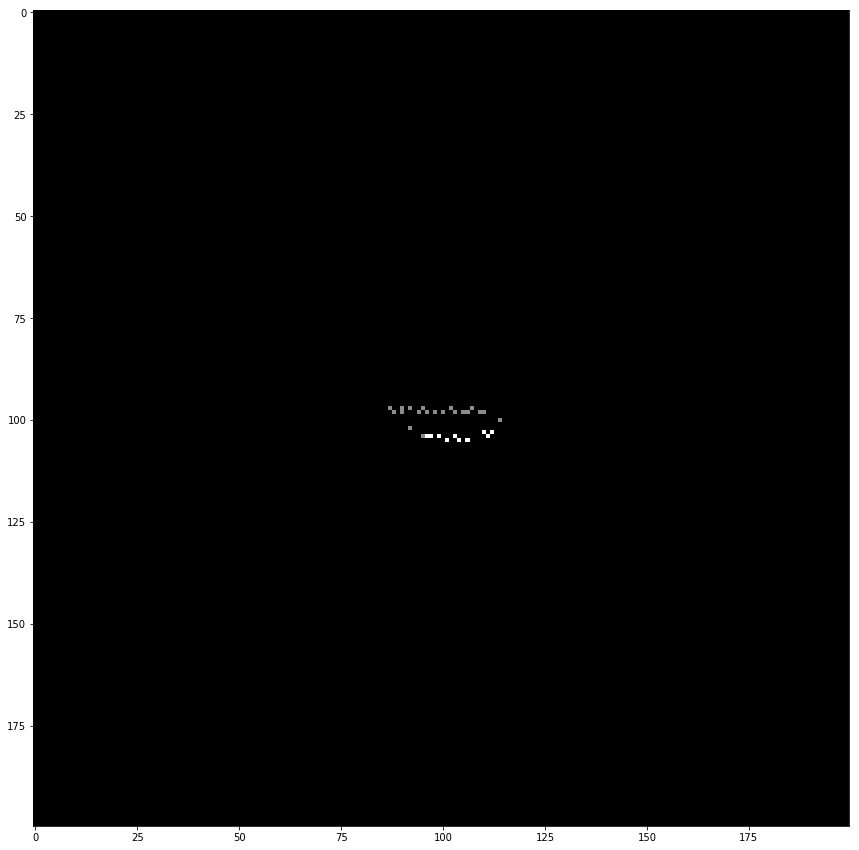

53


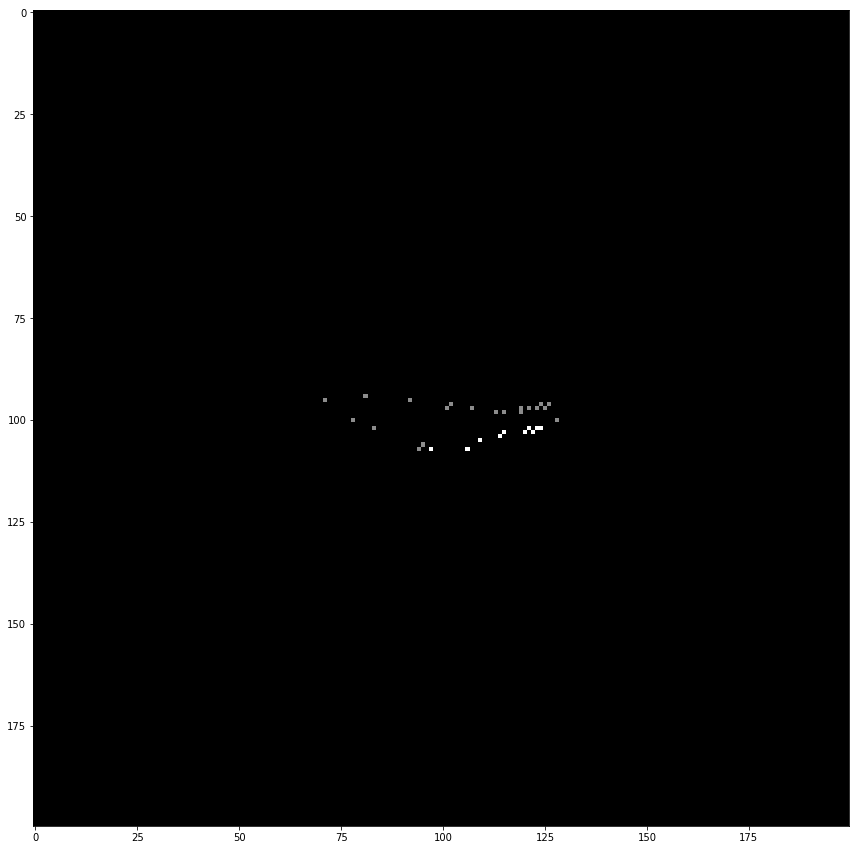

54


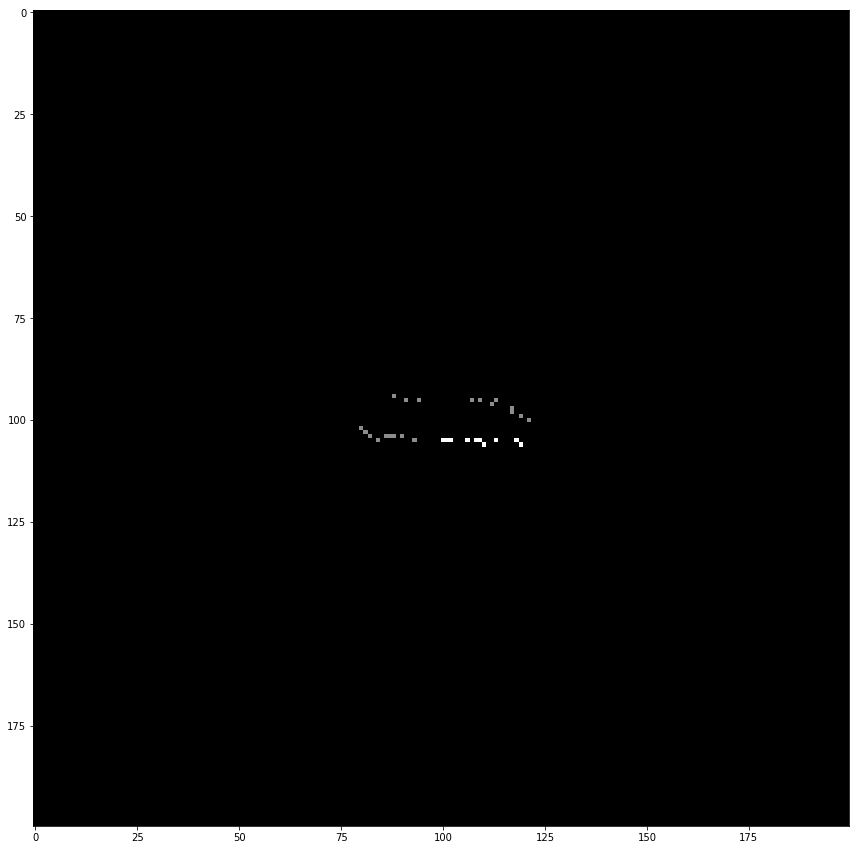

55


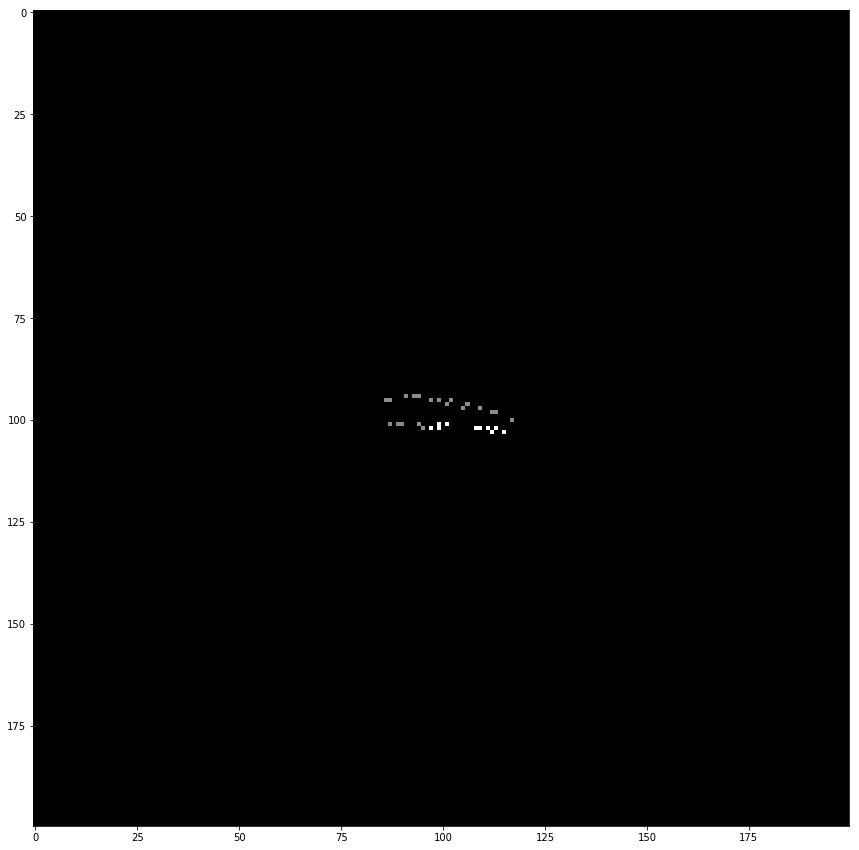

56


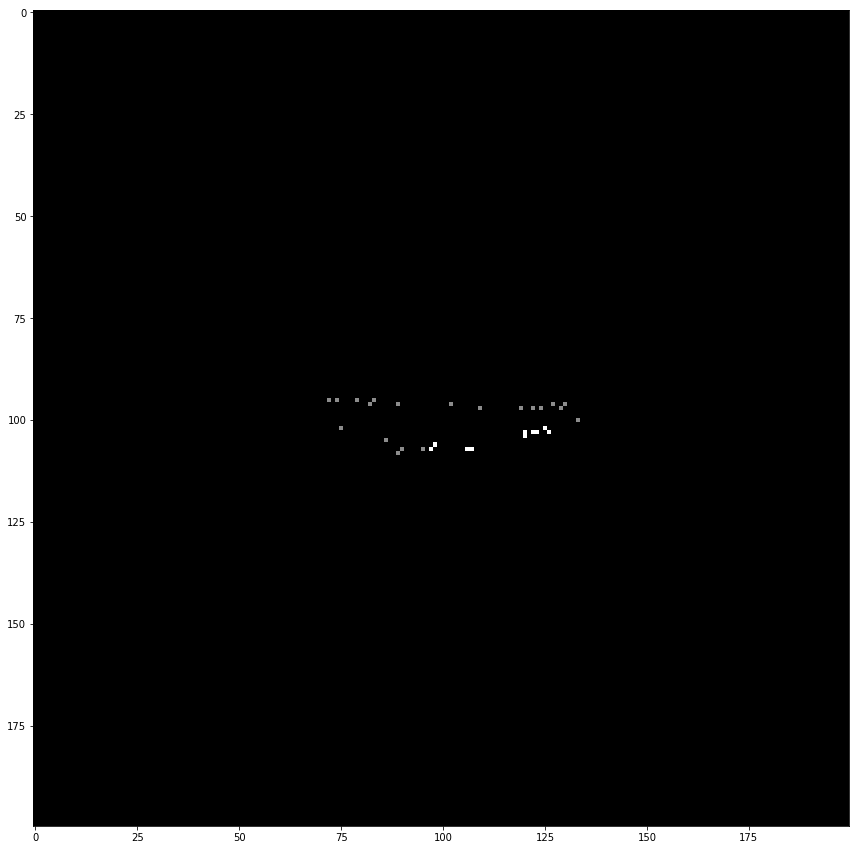

57


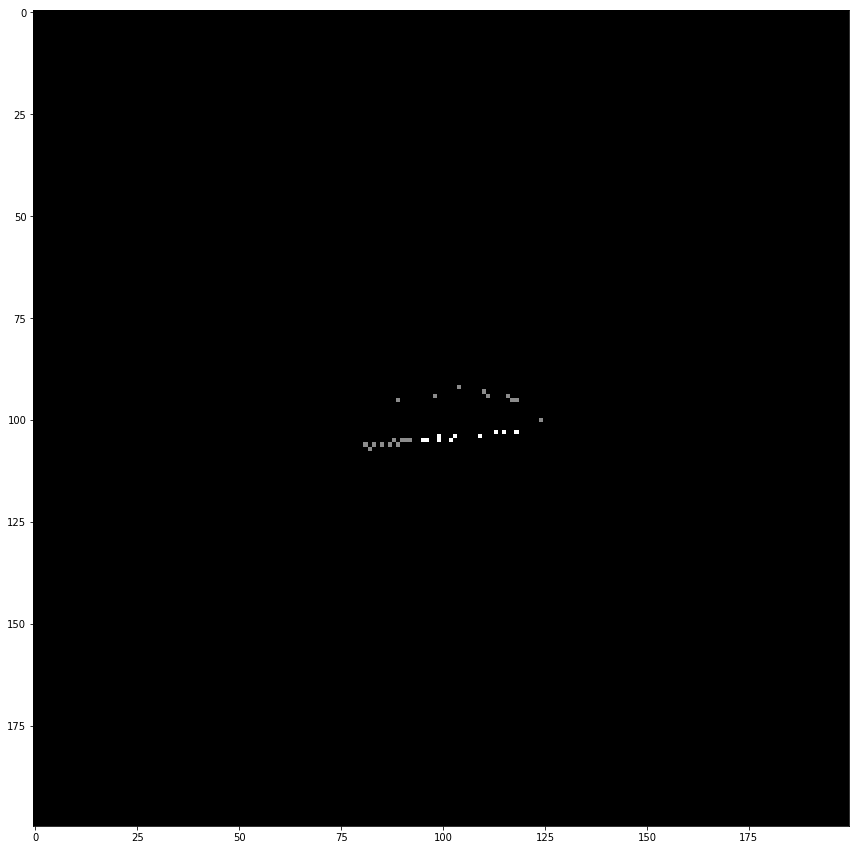

58


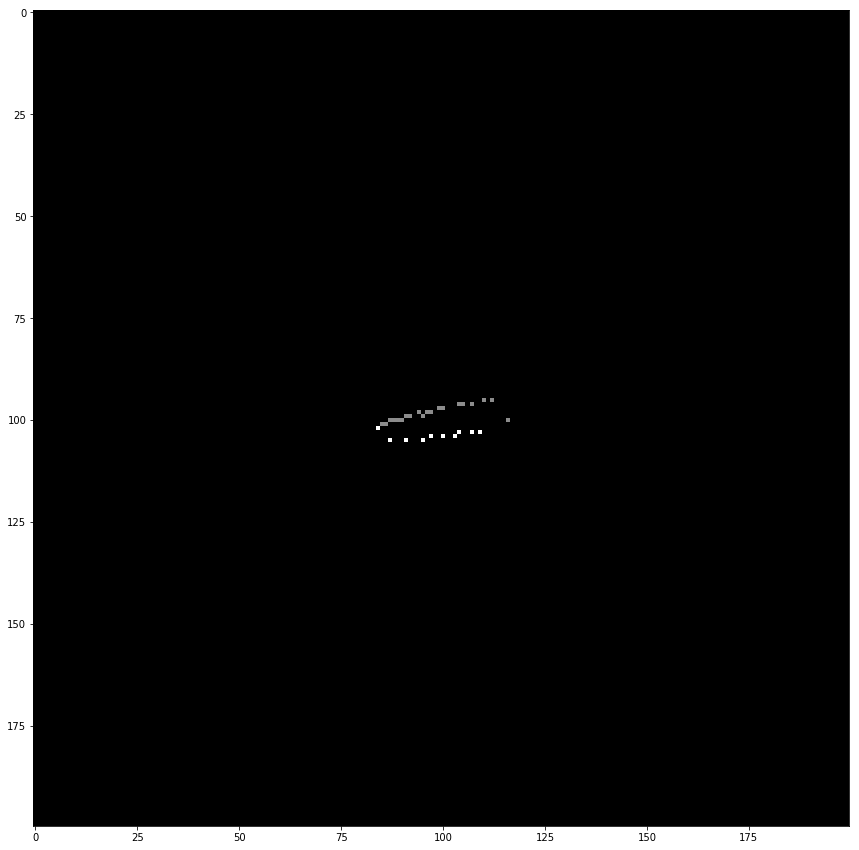

59


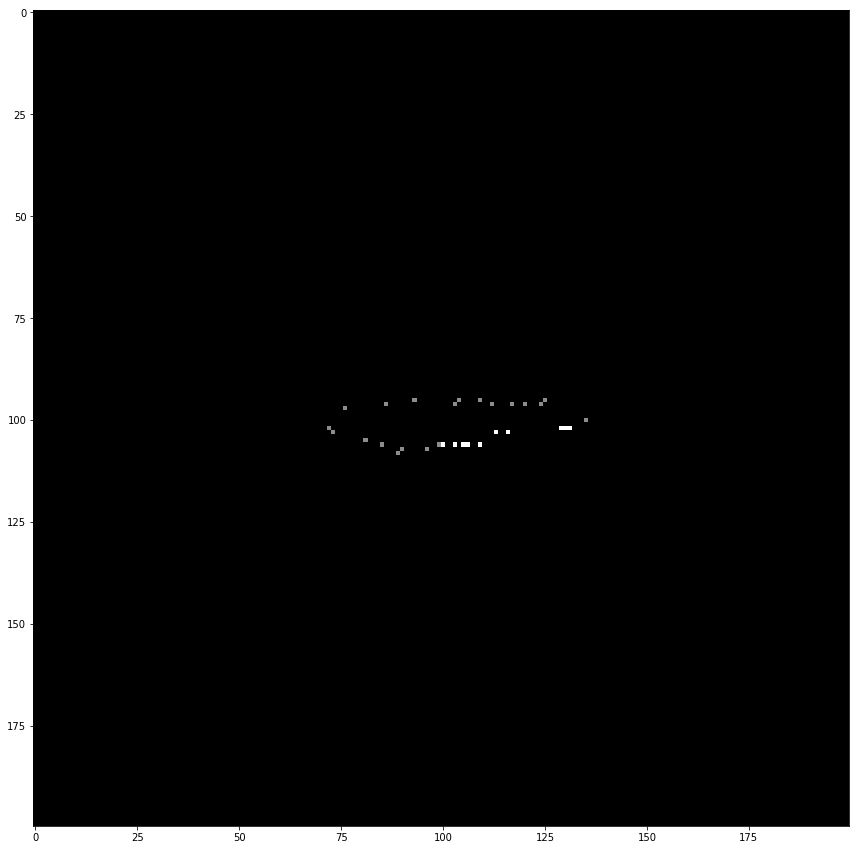

In [3]:
import fishy
import numpy as np

myFishes = np.empty((60),dtype=fishy.FishBlob)


for i in range(0,60):
    myFishes[i] = fishy.FishBlob(np.array(data[i].xs),np.array(data[i].ys),np.array([data[i].c_x,data[i].c_y]))
    if not myFishes[i].length <30:
        f = myFishes[i]
        f.reduceToSubfish(30)
        print(i)
        normalFish = fishy.normalizeFish(f.X,f.Y,f.centroid)
        fishy.printFish(normalFish,canvasSize=200)


In [4]:
#Setup for PCA

cov_mat = np.cov(fishFeatures.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals

NameError: name 'fishFeatures' is not defined

In [18]:
#Some Helpful Functions
import random

def fromFishBlob(fishBlob):
    n = len(fishBlob)
    X,Y = np.reshape(fishBlob[:,:,0],(n)), np.reshape(fishBlob[:,:,1],(n))
    return X,Y

def toFishBlob(X,Y):
    n = len(X)
    x, y = np.reshape(X,(n,1,1)), np.reshape(Y,(n,1,1))
    fishBlob = np.concatenate((x,y),axis=2)
    return fishBlob

def getCentroid(fishBlob):
    # calculate moments of binary image
    M = cv2.moments(fishBlob)
    # calculate x,y coordinate of center
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return cX, cY

def randomSubarray(arr, subarrayLen):
    return arr[sorted(random.sample(range(0,len(arr)),subarrayLen))]

def euclid(a,b):
    vec = b-a
    return math.sqrt(vec[0]**2+vec[1]**2)

#Get numpy array of all distances between points on the fish contour
#stepSize=1 means the distance between neighbours is calculated
#stepSize>1 means a number of points are skipped
#This is useful for estimating hole sizes when you remove one point
def getDistances(fish, stepSize):
    fishSize = len(fish)
    distances = np.zeros((fishSize))
    
    for i, _ in enumerate(distances):
        distances[i] = euclid(fish[i][0],myFish[(i+stepSize)%fishSize][0])
    return distances

In [28]:
randomSubarray(np.arange(10),3)

array([1, 6, 8])

In [ ]:
lens2 = []
for x in subBlobs:
    lens2.append(x.length)
    
plt.hist(lens2)
plt.show()